# Numerical methods with Julia

## Michał Bernardelli

#### Julia packages

In [146]:
using LinearAlgebra
using SpecialMatrices
using Plots

#### How small is zero?

In [219]:
# Float32 data type
i = 1
x = Float32(1)
while i < 50
    x = x/10
    println("(", i, ") ", x)
    i += 1
end

(1) 0.1
(2) 0.01
(3) 0.0009999999
(4) 9.999999e-5
(5) 9.999999e-6
(6) 9.999999e-7
(7) 9.999999e-8
(8) 9.999999e-9
(9) 9.999999e-10
(10) 9.999999e-11
(11) 9.999999e-12
(12) 9.999999e-13
(13) 9.999999e-14
(14) 9.999999e-15
(15) 9.999999e-16
(16) 9.999999e-17
(17) 9.999999e-18
(18) 9.999999e-19
(19) 1.0e-19
(20) 1.0e-20
(21) 1.0e-21
(22) 9.9999997e-23
(23) 1.0e-23
(24) 1.0e-24
(25) 1.0e-25
(26) 1.0e-26
(27) 1.0e-27
(28) 1.0e-28
(29) 1.0e-29
(30) 1.0e-30
(31) 1.0e-31
(32) 9.9999995e-33
(33) 9.999999e-34
(34) 9.999999e-35
(35) 9.9999995e-36
(36) 9.9999995e-37
(37) 1.0e-37
(38) 1.0e-38
(39) 1.0e-39
(40) 1.0e-40
(41) 1.0e-41
(42) 1.0e-42
(43) 1.0e-43
(44) 1.0e-44
(45) 1.0e-45
(46) 0.0
(47) 0.0
(48) 0.0
(49) 0.0


In [220]:
# Float64 data type
i = 1
x = Float64(1)
while i < 350
    x = x/10
    println("(", i, ") ", x)
    i += 1
end

(1) 0.1
(2) 0.01
(3) 0.001
(4) 0.0001
(5) 1.0e-5
(6) 1.0000000000000002e-6
(7) 1.0000000000000002e-7
(8) 1.0000000000000002e-8
(9) 1.0000000000000003e-9
(10) 1.0000000000000003e-10
(11) 1.0000000000000003e-11
(12) 1.0000000000000002e-12
(13) 1.0000000000000002e-13
(14) 1.0000000000000002e-14
(15) 1.0e-15
(16) 1.0000000000000001e-16
(17) 1.0e-17
(18) 1.0e-18
(19) 1.0000000000000001e-19
(20) 1.0000000000000001e-20
(21) 1.0000000000000001e-21
(22) 1.0e-22
(23) 1.0000000000000001e-23
(24) 1.0000000000000001e-24
(25) 1.0000000000000002e-25
(26) 1.0000000000000002e-26
(27) 1.0000000000000002e-27
(28) 1.0000000000000002e-28
(29) 1.0000000000000002e-29
(30) 1.0000000000000003e-30
(31) 1.0000000000000003e-31
(32) 1.0000000000000003e-32
(33) 1.0000000000000004e-33
(34) 1.0000000000000004e-34
(35) 1.0000000000000004e-35
(36) 1.0000000000000004e-36
(37) 1.0000000000000005e-37
(38) 1.0000000000000005e-38
(39) 1.0000000000000004e-39
(40) 1.0000000000000003e-40
(41) 1.0000000000000004e-41
(42) 1.0000

(342) 0.0
(343) 0.0
(344) 0.0
(345) 0.0
(346) 0.0
(347) 0.0
(348) 0.0
(349) 0.0


In [223]:
# arithmetic precision
@show eps(Float32);
@show eps(Float64);

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16


#### Binary system and roundings

In [225]:
# binary expansion of 1/2
bitstring(0.5)

"0011111111100000000000000000000000000000000000000000000000000000"

In [226]:
# binary expansion of 1/10
bitstring(0.1)

"0011111110111001100110011001100110011001100110011001100110011010"

In [179]:
function arithmetic_operations(iter, term)
    result = 1
    
    for i in 1:iter
        result += term
    end
    for i in 1:iter
        result -= term
    end
    println("Result for term ", term, " (", iter, " times) is equal ", result)
    return result
end

arithmetic_operations (generic function with 1 method)

In [255]:
arithmetic_operations(100, 1/2);
arithmetic_operations(1000, 1/2);
arithmetic_operations(10000, 1/2);
arithmetic_operations(100, 1/3);
arithmetic_operations(1000, 1/3);
arithmetic_operations(10000, 1/3);
arithmetic_operations(100, 1/10);
arithmetic_operations(1000, 1/10);
arithmetic_operations(10000, 1/10);

Result for term 0.5 (100 times) is equal 1.0
Result for term 0.5 (1000 times) is equal 1.0
Result for term 0.5 (10000 times) is equal 1.0
Result for term 0.3333333333333333 (100 times) is equal 1.0000000000000002
Result for term 0.3333333333333333 (1000 times) is equal 1.0000000000000064
Result for term 0.3333333333333333 (10000 times) is equal 1.0000000000001166
Result for term 0.1 (100 times) is equal 1.0000000000000009
Result for term 0.1 (1000 times) is equal 0.9999999999999992
Result for term 0.1 (10000 times) is equal 0.9999999999999561


#### Determining the value of sine

In [229]:
pi

π = 3.1415926535897...

In [232]:
@show Float64(pi);
@show sin(0);
@show sin(2*pi);
@show sin(20*pi);
@show sin(2000*pi);
@show sin(2e6*pi);
@show sin(2e19*pi);

Float64(pi) = 3.141592653589793
sin(0) = 0.0
sin(2pi) = -2.4492935982947064e-16
sin(20pi) = -2.4492935982947065e-15
sin(2000pi) = -6.428332918551267e-13
sin(2.0e6pi) = -4.463824362721742e-10
sin(2.0e19pi) = 0.9934765057914389


#### Commutative property of addition (in floating point arithmetics)

In [233]:
# adding numbers in different order
@show 53.54 + 104.44 - 158.98;
@show 104.44 - 158.98 + 53.54;

(53.54 + 104.44) - 158.98 = -1.0
(104.44 - 158.98) + 53.54 = -0.9999999999999929


#### Inverse of a matrix

![MATRIX_INVERSE](excel_inverse_matrix.png)

In [236]:
# matrix
A = [1.0 2 3; 4 5 6; 7 8 9];

# inverse of a matrix
@show inv(A);

LoadError: SingularException(3)

#### Solving system of linear equations

In [78]:
A = [1.2969 0.8648; 0.2161 0.1441];
b = [0.8642; 0.144];
x_given = [0.9911; -0.4870];
@show A;
@show b;

A = [1.2969 0.8648; 0.2161 0.1441]
b = [0.8642, 0.144]
x_given = [0.9911, -0.487]


In [79]:
# check
@show b-A*x_given;

b - A * x_given = [1.0000000161269895e-8, -1.0000000022492017e-8]


In [80]:
# solve with inv
x_inv = inv(A)*b;
@show b-A*x_inv;

b - A * x_inv = [4.027597699796104e-9, 6.711110833723666e-10]


In [85]:
# solve with \
x_sol = A\b;
@show b-A*x_sol;

b - A * x_sol = [3.3306690738754696e-16, 8.326672684688674e-17]


In [87]:
# actual solution
x_actual = [2; -2];
@show b-A*x_actual;

b - A * x_actual = [1.1102230246251565e-16, 2.7755575615628914e-17]


In [88]:
# comparison
@show x_given;
@show x_inv;
@show x_sol;
@show x_actual;

x_given = [0.9911, -0.487]
x_inv = [2.000000001862645, -2.0000000074505806]
x_sol = [2.000000002400302, -2.0000000035996206]
x_actual = [2, -2]


#### Hilbert's matrix

In [237]:
# own implementation of Hilbert's matrix
function hilb(n::Int) 
    return [1/(i+j-1) for i in 1:n, j in 1:n]
end

hilb (generic function with 1 method)

In [238]:
function hilb_solve(n)
    H = hilb(n);
    b = ones(n,1);
    x = inv(H)*b;
    @show (H*x)[1:5];
    @show norm(b-H*x,2);
    @show norm(b-H*x,Inf);
end

hilb_solve (generic function with 1 method)

In [243]:
println("-------- n = 5 ---------")
hilb_solve(5);
println("\n-------- n = 20 ---------")
hilb_solve(20);
println("\n-------- n = 40 ---------")
hilb_solve(40);

-------- n = 5 ---------
(H * x)[1:5] = [0.9999999999953345, 0.9999999999964462, 0.9999999999971183, 0.9999999999975273, 0.9999999999979008]
norm(b - H * x, 2) = 7.295306678478712e-12
norm(b - H * x, Inf) = 4.665490216382295e-12

-------- n = 20 ---------
(H * x)[1:5] = [23.43481858074665, 21.352082148194313, 19.642749831080437, 18.212073266506195, 16.99516624212265]
norm(b - H * x, 2) = 60.060799378819674
norm(b - H * x, Inf) = 22.43481858074665

-------- n = 40 ---------
(H * x)[1:5] = [-56.408382833004, -51.82222217321396, -48.020774841308594, -44.80644088983536, -42.044527530670166]
norm(b - H * x, 2) = 183.84017335556325
norm(b - H * x, Inf) = 57.408382833004


In [245]:
# inverse f Hilbert's matrix - Float64
H = hilb(5);
display(inv(H)*H);

5×5 Matrix{Float64}:
  1.0          -1.05656e-14   1.73353e-14  -5.68434e-14  -2.12546e-14
  5.87708e-13   1.0          -9.71984e-13   4.54747e-13  -9.91306e-14
 -5.91887e-12  -3.55623e-12   1.0          -4.54747e-12  -1.76449e-12
  1.93117e-12  -1.00298e-12  -3.97796e-12   1.0           5.44009e-13
  3.76379e-12   1.10782e-12   3.80797e-12  -1.81899e-12   1.0

In [246]:
# inverse f Hilbert's matrix - Rational{Int64}
H = Hilbert(5);
display(H);
display(inv(H)*H);

5×5 Hilbert{Rational{Int64}}:
 1//1  1//2  1//3  1//4  1//5
 1//2  1//3  1//4  1//5  1//6
 1//3  1//4  1//5  1//6  1//7
 1//4  1//5  1//6  1//7  1//8
 1//5  1//6  1//7  1//8  1//9

5×5 Matrix{Rational{Int64}}:
 1//1  0//1  0//1  0//1  0//1
 0//1  1//1  0//1  0//1  0//1
 0//1  0//1  1//1  0//1  0//1
 0//1  0//1  0//1  1//1  0//1
 0//1  0//1  0//1  0//1  1//1

In [253]:
function hilb_solve_better(n)
    H = hilb(n);
    b = ones(n,1);
    x = H\b;
    @show (H*x)[1:5];
    @show norm(b-H*x,2);
    @show norm(b-H*x,Inf);
end

hilb_solve_better (generic function with 1 method)

In [254]:
println("-------- n = 5 ---------")
hilb_solve_better(5);
println("\n-------- n = 20 ---------")
hilb_solve_better(20);
println("\n-------- n = 40 ---------")
hilb_solve_better(40);

-------- n = 5 ---------
(H * x)[1:5] = [0.9999999999999842, 0.9999999999999847, 0.9999999999999909, 0.9999999999999716, 0.9999999999999992]
norm(b - H * x, 2) = 3.707496661485592e-14
norm(b - H * x, Inf) = 2.842170943040401e-14

-------- n = 20 ---------
(H * x)[1:5] = [0.9999999552965164, 1.0000000596046448, 1.0000000298023224, 1.0000000596046448, 1.0000000298023224]
norm(b - H * x, 2) = 1.883391240204057e-7
norm(b - H * x, Inf) = 7.450580596923828e-8

-------- n = 40 ---------
(H * x)[1:5] = [1.0, 1.0, 0.9999999403953552, 0.9999999403953552, 1.0]
norm(b - H * x, 2) = 2.05938144938428e-7
norm(b - H * x, Inf) = 5.960464477539063e-8


#### Matrix condition number

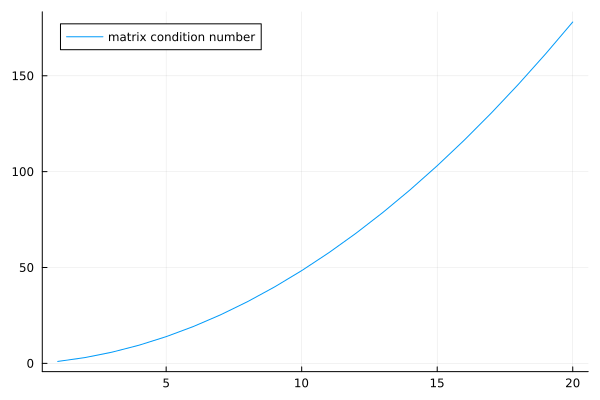

In [151]:
# condition number of the tridiagonal matrix
n = 20;
cond_tridiagonal = zeros(n);
for i in 1:n
    A = Array(Tridiagonal(-1*ones(i-1), 2*ones(i), -1*ones(i-1)));
    cond_tridiagonal[i] = cond(A);
end
plot(cond_tridiagonal, label = "matrix condition number")

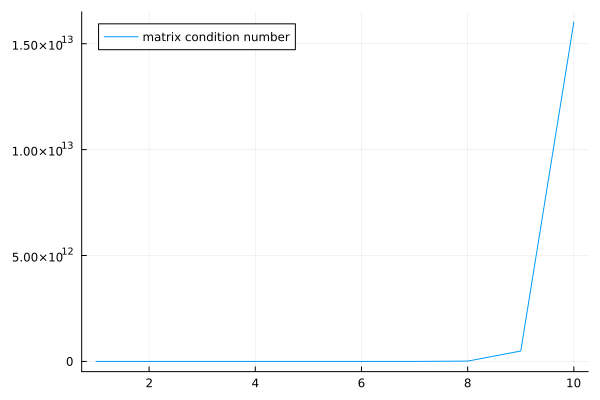

In [152]:
# condition number of the Hilbert's matrix
n = 10;
cond_hilbert = zeros(n);
for i in 1:n
    cond_hilbert[i] = cond(hilb(i));
end
plot(cond_hilbert, label = "matrix condition number")

#### Calculating exp

In [262]:
# first draft of the solution
function my_exp(x, max_iter = 1000)
    result = 1;
    tmp = 1;
    for k = 1:max_iter
        tmp *= x/k;
        result += tmp;
    end
    println("\nexp for x = ", x)
    @show exp(x);
    @show result;
    @show (exp(x) - result);
    return result
end

my_exp (generic function with 2 methods)

In [268]:
my_exp(0, 10);
my_exp(1, 100);
my_exp(10, 1000);
my_exp(25, 1000);
my_exp(50, 10000);
my_exp(100, 10000);
my_exp(-10, 1000);
my_exp(-25, 1000);
my_exp(-50, 10000);
my_exp(-100, 10000);


exp for x = 0
exp(x) = 1.0
result = 1.0
exp(x) - result = 0.0

exp for x = 1
exp(x) = 2.718281828459045
result = 2.7182818284590455
exp(x) - result = -4.440892098500626e-16

exp for x = 10
exp(x) = 22026.465794806718
result = 22026.465794806714
exp(x) - result = 3.637978807091713e-12

exp for x = 25
exp(x) = 7.200489933738588e10
result = 7.200489933738591e10
exp(x) - result = -3.0517578125e-5

exp for x = 50
exp(x) = 5.184705528587072e21
result = 5.184705528587081e21
exp(x) - result = -9.437184e6

exp for x = 100
exp(x) = 2.6881171418161356e43
result = 2.688117141816137e43
exp(x) - result = -1.4855280471424563e28

exp for x = -10
exp(x) = 4.5399929762484854e-5
result = 4.539992967040021e-5
exp(x) - result = 9.208464475966502e-14

exp for x = -25
exp(x) = 1.3887943864964021e-11
result = 8.181278981020606e-7
exp(x) - result = -8.181140101581956e-7

exp for x = -50
exp(x) = 1.9287498479639178e-22
result = 2041.8329628976246
exp(x) - result = -2041.8329628976246

exp for x = -100
exp(x) =

In [270]:
# first draft of the solution
function my_exp_better(x, max_iter = 1000)
    result = 1;
    tmp = 1;
    for k = 1:max_iter
        tmp *= abs(x)/k;
        result += tmp;
    end
    if (x < 0)
        result = 1/result;
    end
    println("\nexp for x = ", x)
    @show exp(x);
    @show result;
    @show (exp(x) - result);
    return result
end

my_exp_better (generic function with 2 methods)

In [271]:
my_exp_better(-25, 1000);
my_exp_better(-50, 10000);
my_exp_better(-100, 10000);


exp for x = -25
exp(x) = 1.3887943864964021e-11
result = 1.3887943864964013e-11
exp(x) - result = 8.077935669463161e-27

exp for x = -50
exp(x) = 1.9287498479639178e-22
result = 1.9287498479639145e-22
exp(x) - result = 3.291384182302405e-37

exp for x = -100
exp(x) = 3.720075976020836e-44
result = 3.7200759760208336e-44
exp(x) - result = 2.4892061111444567e-59


*Preparation of this workshop has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.*

![SGH & NAWA](logo.png)